<a href="https://colab.research.google.com/github/1sheca/Heart-Attack-Risk-Prediction/blob/main/heart_attack_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import files
# Prompt the user to upload a file
uploaded = files.upload()
# Access the uploaded file
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

Saving framingham.csv to framingham (2).csv
Uploaded file: framingham (2).csv


In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
%matplotlib inline

In [64]:
import pandas as pd
# Load the data from the uploaded file
data = pd.read_csv('/content/framingham.csv')
# Drop the 'education' column
data.drop(['education'], axis=1, inplace=True)
# Display the first few rows of the DataFrame
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [65]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [66]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


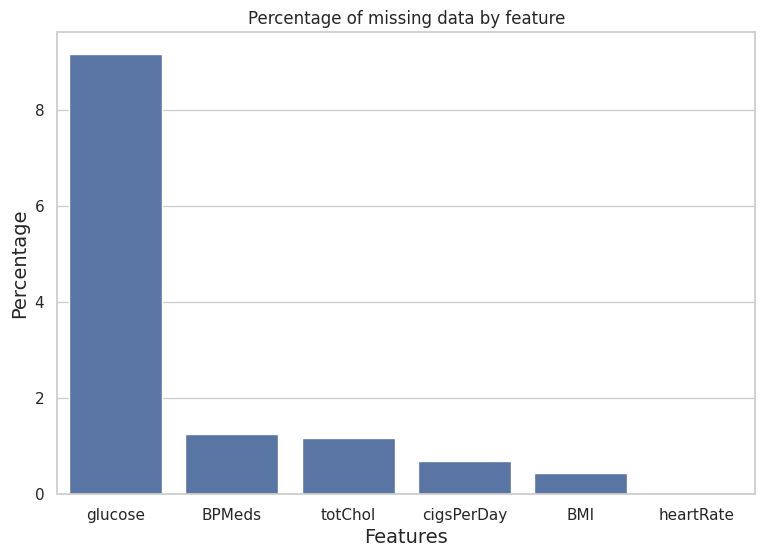

In [67]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [68]:
data.dropna(axis=0, inplace=True)
data.shape
data.head

<bound method NDFrame.head of       male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1                0         0    250.0  121.0   81.0  28.73       95.0   
2                0         0    245.0  127.5   80.0  25.34       75.0   
3                1         0    225.0  150.0   95.0  28.58       65.0   
4                0         0    285.0  130.0   84.0  23.10       85.0   
...            ...       ...      ...    ...    ...    ...        ...   
4233             1         0    313.0  179.0   92.0  25.97       66.0   
4234             0         0    207.0  126.5   80.0  19.71       65.0   
4237             0         0    269.0  133.5   83.0  21.47       80.0   
4238             1         0    185.0  141.0   98.0  25.60       67.0   
4239             0         0    196.0  133.0   86.0  20.91       85.0   

      glucose  TenYearCHD  
0        77.0           0  
1        76.0           0  
2        70.0           0  
3       103.0           1  
4        85.0           0  
...       ...         ...  
4233     86.0           1  
4234     68.0           0  
4237    107.0           0  
4238     72.0           0  
4239     80.0           0  

[3751 rows x 15 columns]>

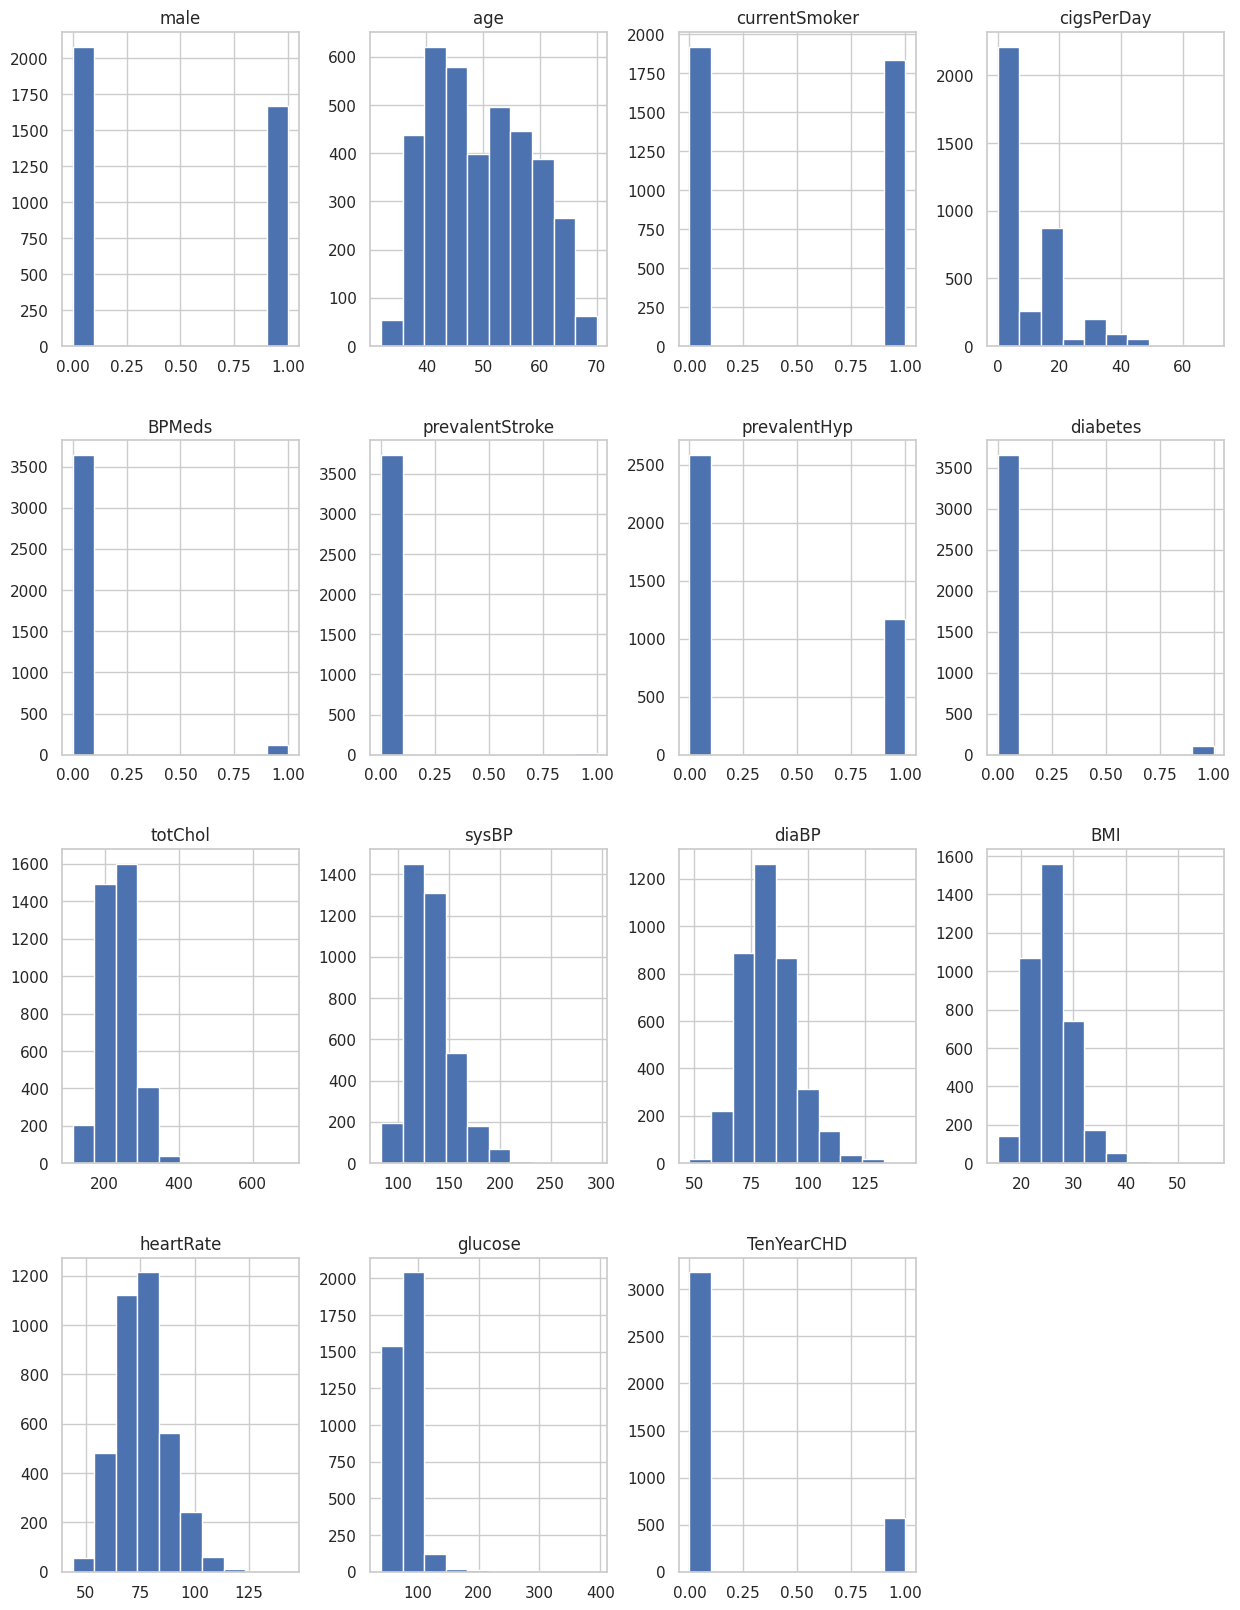

In [69]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

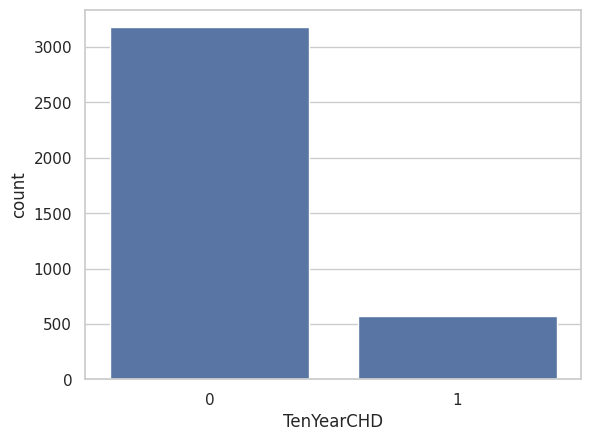

There are 3179 patients without heart disease and 572 patients with the disease


In [70]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

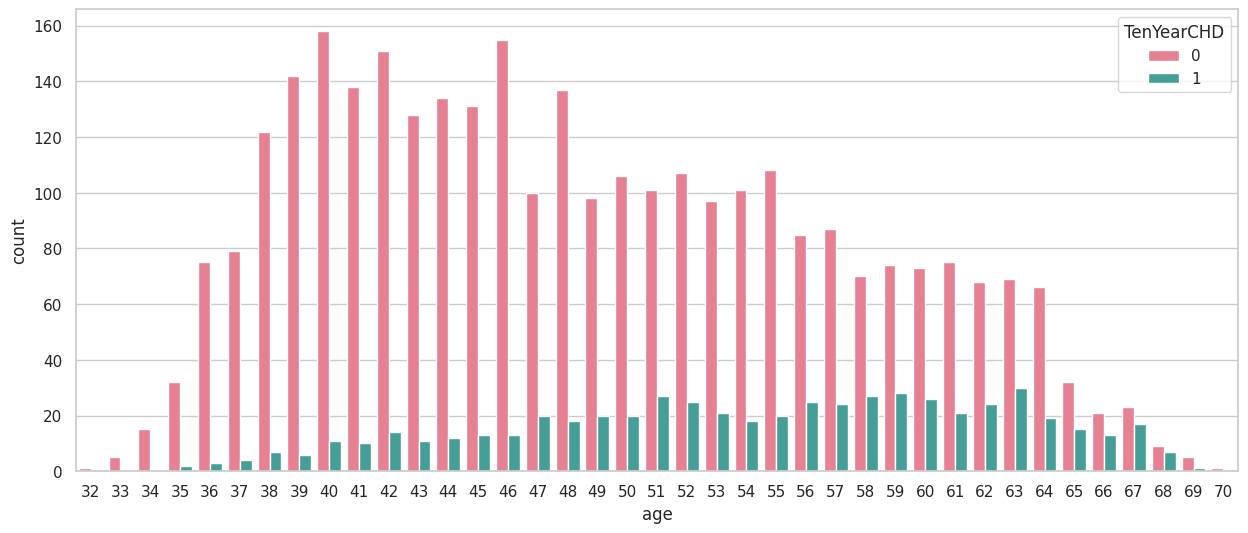

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

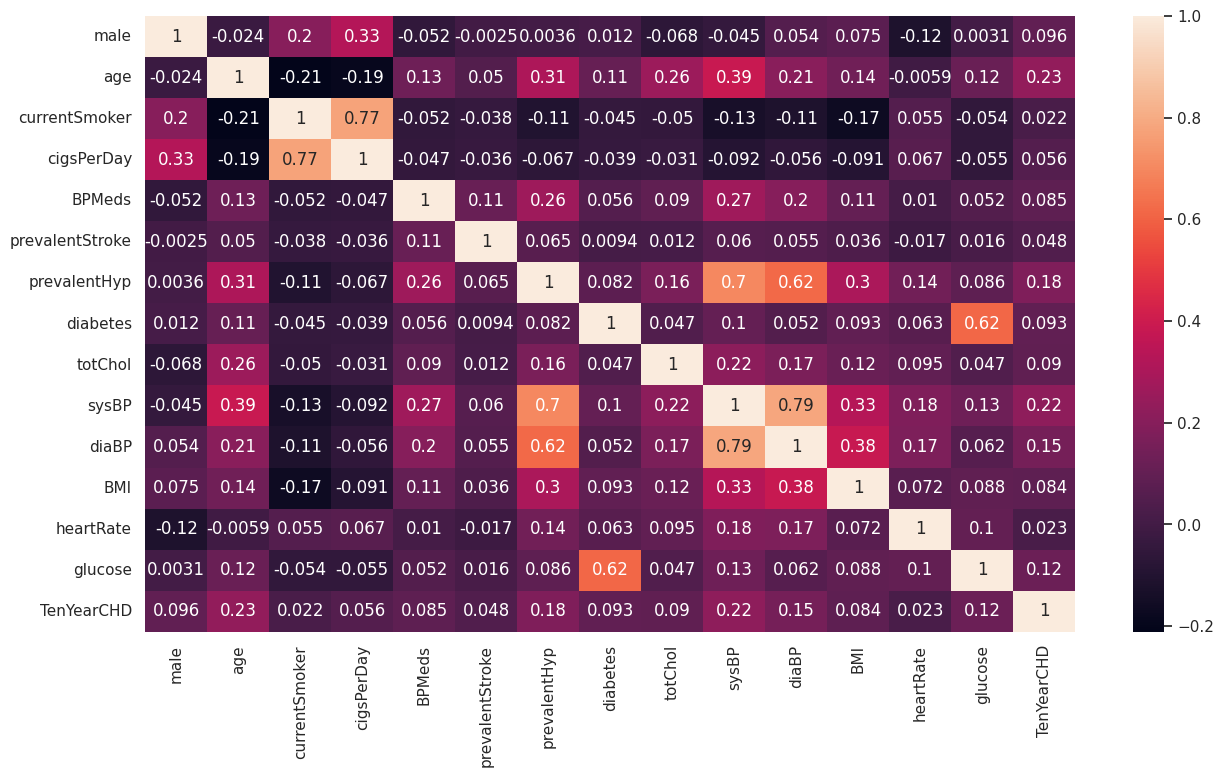

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [73]:
!pip install -U Boruta

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Define the features
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Initialize Random Forest classifier
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# Fit the Random Forest model to the data
forest.fit(x, y)

# Get feature importances
feature_importances = forest.feature_importances_

# Define a threshold for feature importance
threshold = 0.01  # Adjust this threshold as needed

# Select features with importance greater than the threshold
selected_features = data.columns[:-1][feature_importances > threshold].tolist()

# Print selected features
print("Selected Features:", selected_features)


Selected Features: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [75]:
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

# Define the features
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Initialize Random Forest classifier
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# Fit the Random Forest model to the data
forest.fit(x, y)

# Get feature importances
feature_importances = forest.feature_importances_

# Define a threshold for feature importance
threshold = 0.01  # Adjust this threshold as needed

# Select features with importance greater than the threshold
selected_features = data.columns[:-1][feature_importances > threshold].tolist()

# Print selected features
print("Selected Features:", selected_features)

# Extract features and target using selected features
X_top = data[selected_features]
y = data['TenYearCHD']

# Fit logistic regression model
model = sm.Logit(y, X_top)
result = model.fit()

# Display summary
print(result.summary())

# Calculate odds ratios
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))


Selected Features: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Optimization terminated successfully.
         Current function value: 0.401649
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3740
Method:                           MLE   Df Model:                           10
Date:                Sat, 25 May 2024   Pseudo R-squ.:                 0.05939
Time:                        16:46:51   Log-Likelihood:                -1506.6
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 1.739e-35
                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

In [76]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [77]:
num_before = dict(Counter(y))

In [78]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_top, y)

In [79]:
num_after = dict(Counter(y_smote))

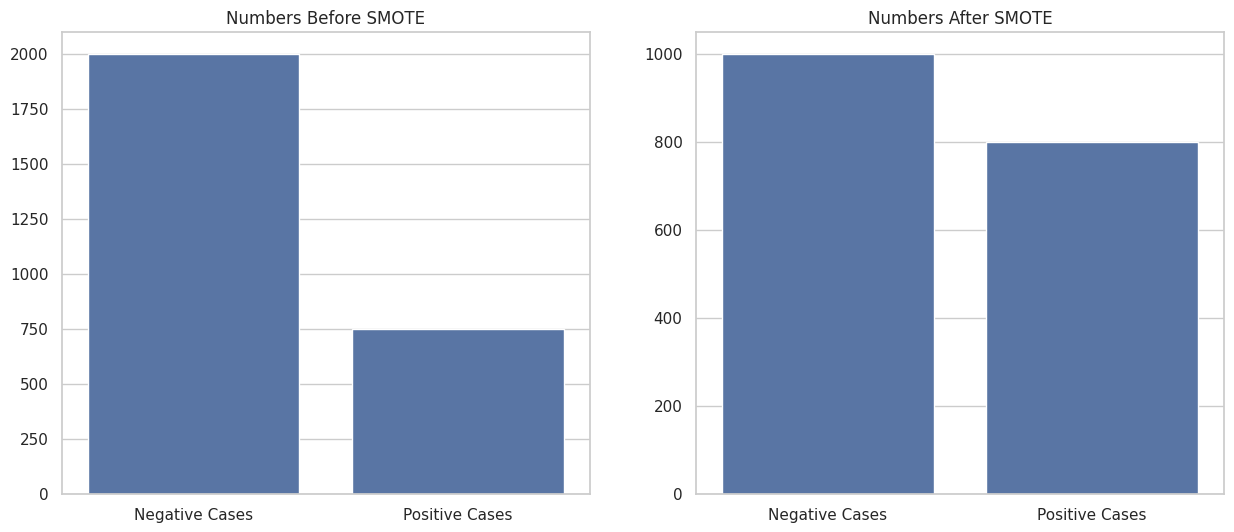

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming num_before and num_after are already defined
num_before = {0: 2000, 1: 751}  # Replace with actual values
num_after = {0: 1000, 1: 800}  # Replace with actual values

labels = ["Negative Cases", "Positive Cases"]

plt.figure(figsize=(15,6))

# Plot numbers before SMOTE
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before SMOTE")

# Plot numbers after SMOTE
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After SMOTE")

plt.show()


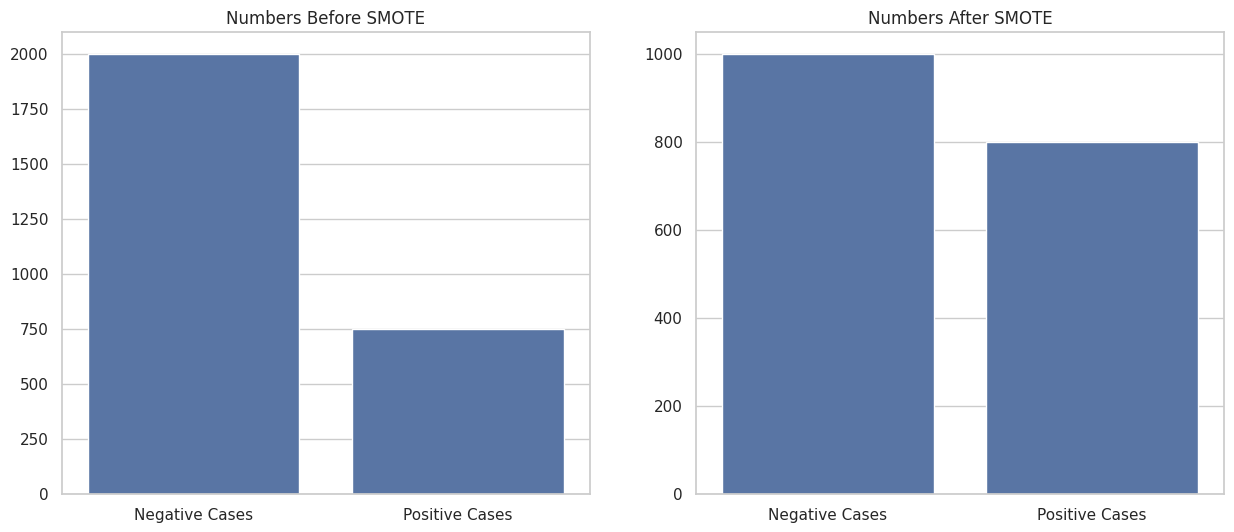

In [81]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before SMOTE")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After SMOTE")
plt.show()

In [82]:
# Define the list of selected features
top_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [84]:
# Combine X_smote and y_smote into a new DataFrame
new_data = pd.concat([pd.DataFrame(X_smote, columns=top_features), pd.DataFrame(y_smote, columns=['TenYearCHD'])], axis=1)

# Display the first few rows to verify
new_data.head()


,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,285.0,130.0,84.0,23.10,85.0,85.0,0


In [85]:
# Extract features and target
X_new = new_data[top_features]
y_new = new_data['TenYearCHD']


In [86]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)


In [87]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the training features
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing features
X_test_scaled = scaler.transform(X_test)


In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn_clf = KNeighborsClassifier()


In [89]:
# Define the parameter grid for grid search
params = {'n_neighbors': range(1, 21)}

In [90]:
from sklearn.model_selection import GridSearchCV

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn_clf, param_grid=params, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [91]:
# Get the best parameters from grid search
best_params = grid_search.best_params_

In [92]:
# Initialize KNN classifier with the best parameters
knn_clf_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])

# Train the classifier
knn_clf_best.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=2)

In [93]:
# Make predictions on the test set
knn_predict = knn_clf_best.predict(X_test_scaled)


In [94]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predict)
print(f"Using K-nearest neighbors, we get an accuracy of {round(knn_accuracy * 100, 2)}%")


Using K-nearest neighbors, we get an accuracy of 85.22%


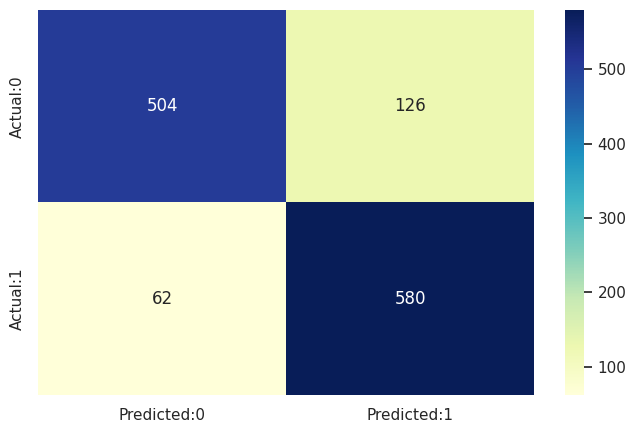

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, knn_predict)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()


In [96]:
h_risk = [[65, 150, 180, 70, 26.97, 80, 77]]  # Example instance with risk
prediction_risk = knn_clf_best.predict(scaler.transform(h_risk))
print('You are safe. 😊') if prediction_risk[0] == 0 else print('Sorry, You are at risk. 👽')  # Print prediction-1

Sorry, You are at risk. 👽


In [97]:
h3 = [[45, 220, 130, 90, 30.5, 75, 85]]
prediction3 = knn_clf_best.predict(scaler.transform(h3))
print('You are safe. 😊') if prediction3[0] == 0 else print('Sorry, You are at risk. 👽')  # Print prediction-2

You are safe. 😊


In [98]:
h1 = [[39, 195, 106, 70, 26.97, 80, 77]]
prediction1 = knn_clf_best.predict(scaler.transform(h1))
print('You are safe. 😊') if prediction1[0] == 0 else print('Sorry, You are at risk. 👽')  # Print prediction-1

h2 = [[65, 150, 180, 70, 26.97, 80, 77]]
prediction2 = knn_clf_best.predict(scaler.transform(h2))
print('You are safe. 😊') if prediction2[0] == 0 else print('Sorry, You are at risk. 👽')  # Print prediction-2

h3 = [[45, 220, 130, 90, 30.5, 75, 85]]
prediction3 = knn_clf_best.predict(scaler.transform(h3))
print('You are safe. 😊') if prediction3[0] == 0 else print('Sorry, You are at risk. 👽')  # Print prediction-3

h4 = [[55, 250, 145, 95, 28.3, 70, 100]]
prediction4 = knn_clf_best.predict(scaler.transform(h4))
print('You are safe. 😊') if prediction4[0] == 0 else print('Sorry, You are at risk. 👽')  # Print prediction-4


You are safe. 😊
Sorry, You are at risk. 👽
You are safe. 😊
Sorry, You are at risk. 👽


In [99]:
h1 = [[39, 195, 106, 70, 26.97, 80, 77]]  # Example instance 1
h2 = [[65, 150, 180, 70, 26.97, 80, 77]]  # Example instance 2
prediction1 = knn_clf_best.predict(scaler.transform(h1))
prediction2 = knn_clf_best.predict(scaler.transform(h2))
print('You are safe. 😊') if prediction1[0] == 0 else print('Sorry, You are at risk. 👽')  # Print prediction for instance 1
print('You are safe. 😊') if prediction2[0] == 0 else print('Sorry, You are at risk. 👽')  # Print prediction for instance 2


You are safe. 😊
Sorry, You are at risk. 👽
